In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
corpus = set()
with open("data/20NG/20ng-train-stemmed.txt") as f:
    collection = f.readlines()
    for i, a_line in enumerate(collection):
        doc = a_line.split()
        corpus.update(doc[1:])
len(corpus)

54580

In [3]:
corpus

{'settl',
 'pave',
 'wool',
 'parsimoni',
 'ntitl',
 'malama',
 'bangladesh',
 'foxman',
 'reemphas',
 'tenent',
 'awai',
 'pricetag',
 'sabbat',
 'isyancilar',
 'rvik',
 'notz',
 'earlham',
 'neumann',
 'izyat',
 'fingernail',
 'xtrint',
 'probobl',
 'titiu',
 'terakki',
 'forecheck',
 'sahl',
 'availbl',
 'soem',
 'hjstein',
 'vermillion',
 'optimis',
 'perfer',
 'hrh',
 'xscope',
 'tyngsboro',
 'hopeless',
 'becuas',
 'mutlu',
 'bram',
 'polito',
 'emerich',
 'ishmael',
 'duteinh',
 'undiscuss',
 'stardog',
 'ruimt',
 'ussr',
 'erickson',
 'mastership',
 'safti',
 'timmbak',
 'mainland',
 'floppydiskdr',
 'tablewidgetclass',
 'morgani',
 'rhythm',
 'rubin',
 'klin',
 'positron',
 'narr',
 'tipster',
 'mkii',
 'wider',
 'eaten',
 'wmiller',
 'pamphlet',
 'frascati',
 'anglican',
 'yamashita',
 'nop',
 'chin',
 'nrr',
 'forehand',
 'stam',
 'nevi',
 'moir',
 'quantiti',
 'lgii',
 'panda',
 'pqprtinnf',
 'byoung',
 'thyagi',
 'peora',
 'rlee',
 'certiorari',
 'exitworkproc',
 'honu',
 

In [4]:
with open("data/20NG/20ng-test-stemmed.txt") as f:
    collection = f.readlines()
    n = len(collection)
    words_appeared_in_train = np.zeros(n)
    doc_len = np.zeros(n)
    for i, a_line in enumerate(collection):
        words = a_line.split()
        doc = words[1:]
        words_appeared_in_train[i] = sum([1 if word in corpus else 0 for word in doc])
        doc_len[i] = len(doc)

In [5]:
words_appeared_in_train

array([ 66., 308., 185., ...,  81., 175.,  71.])

In [6]:
doc_len

array([ 70., 308., 185., ...,  87., 180.,  76.])

In [7]:
np.mean(words_appeared_in_train / doc_len)

0.9671212901459514

In [8]:
np.min(words_appeared_in_train / doc_len)

0.4

In [9]:
df = pd.DataFrame({'words_appeared_in_train':words_appeared_in_train, 'doc_len':doc_len})
df["percentage"] = df.words_appeared_in_train/df.doc_len

In [10]:
df.describe()

,words_appeared_in_train,doc_len,percentage
count,7527.000000,7527.000000,7527.000000
mean,134.774412,138.678225,0.967121
std,267.960498,274.130128,0.041242
min,1.000000,1.000000,0.400000
25%,47.000000,49.000000,0.954545
50%,82.000000,84.000000,0.978261
75%,140.000000,144.000000,0.994975
max,6128.000000,6142.000000,1.000000


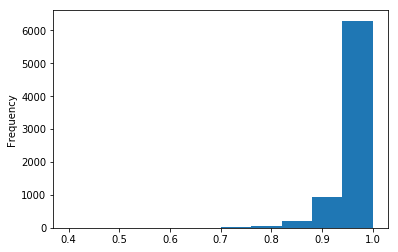

In [12]:
df.percentage.plot.hist()